# Introducción a la Programación en MATLAB (C9)

Mauricio Tejada

ILADES - Universidad Alberto Hurtado

Agosto 2017

## Contenidos

- [Diferenciación e Integración Numérica](#9.-Diferenciación-e-Integración-Numérica)
    - [Diferenciación](#9.1-Diferenciación)
    - [Integrales](#9.2-Integración)


## 9. Diferenciación e Integración Numérica

### 9.1 Diferenciación

*Ideas Básicas:* La forma más natural de aproximar una derivada es reemplazarla con una diferencia finita. Recordemos que la definición de derivada:

$$ f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h)-f(x)}{h}$$ 

Por tanto la aproximación será: 

$$f'(x) = \frac{f(x+h)-f(x)}{h}$$ 

para un $h$ pequeño. Dado que la anterior ecuación representa una aproximación a la definición de derivada, existirá un error de aproximación asociado. 

Una alternativa, con un error de aproximación menor, es construir la aproximación usando diferencias a los dos lados:

$$f'(x) = \frac{f(x+h)-f(x-h)}{2h}$$ 

¿Cuán pequeño debe ser $h$? Existe una disyuntiva:

- Cuando $h$ es muy pequeño, errores de redondeo pueden llevar a un resultado sin sentido.
- Cuando $h$ es muy grande, generar una aproximación muy pobre.

Miranda y Fackler proveen una regla para la aproximación de dos lados: $$h=max(|x|,1)*\sqrt[3]{\epsilon}$$ con $\epsilon$ es denominado *machine precision*. 

Escribamos la función que calcula la jacobiana de una función (tomada del libro de Miranda y Fackler).

```
function fjac = fdjac(f,x)

h = eps^(1/3)*max(abs(x),1);

xh1 = x+h;
xh0 = x-h;
hh  = xh1- xh0;  % 2h

for j=1:length(x);
    xx = x;
    xx(j) = xh1(j);
    f1 = feval(f,xx);
    xx(j) = xh0(j);
    f0 = feval(f,xx);
    fjac(:,j) = (f1-f0)/hh(j);
end

end
```

Probemos la función aproximando la derivada de la función $$f(x) = 2x^2+x-1$$

Sabemos que: $$f'(x) = 4x + 1$$ y evaluando en $x=2$ tenemos $f'(2) = 9$.

In [1]:
% Definimos la funcion
fx = @(x) 2*x^2 + x - 1;

% Aplicamos la función fdjac (nota que pasamos una función como argumento)
derv = fdjac(fx,2)


derv =

    9.0000


Tomemos ahora la siguiente función: $$f(x,y,z) = xyz + 2xy + 2yz + x + y + z$$

y usemos la función `fdjac` para encontrar el gradiente de la función.  

In [2]:
% Definimos la función
fxyz = @(x) x(1)*x(2)*x(3) + 2*x(1)*x(2) + 2*x(2)*x(3) + x(1) + x(2) + x(3); 

% Aplicamos la función fdjac (nota que pasamos una función como argumento)
x0 = [1; 1; 1];

derv = fdjac(fxyz,x0)

derv =

    4.0000    6.0000    4.0000


Ahora escribamos el sistema: 

$$f(x,y) =  x^2 + y^2 - 2$$
$$g(x,y) = xy$$ 

en un m-file.

```
function f = sys(var)

f = zeros(length(var),1);

x = var(1);
y = var(2);

f(1) = x^2 + y^2 - 2;
f(2) = x*y;

end
```

Ahora usemos la función `fdjac` para encontrar la matriz jacobiana del sistema evaluada en el punto $(1,1)$:

In [3]:
clear all;
x0 = [1; 1];
g = fdjac('sys',x0)

g =

    2.0000    2.0000
    1.0000    1.0000


Un alternativa es usar el toolbox [Adaptive Robust Numerical Differentiation](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwiCp5-chaHOAhUCgZAKHSI1DbcQFggjMAA&url=https%3A%2F%2Fwww.mathworks.com%2Fmatlabcentral%2Ffileexchange%2F13490-adaptive-robust-numerical-differentiation&usg=AFQjCNGM1pRSGhe-PSMfNYjTOHuQWFoaQg&sig2=ki8IPbeN1lEwVdtiCOrw5Q). Este toolbox es gratuito y permite, bajo la lógica anterior pero usando métodos adaptativos, calcular la derivada (1er, 2do, 3er y 4to orden), el vector gradiente, la matriz jacobiana y la matriz hessiana. Las opciones básicas son:

- Derivadas Parciales: `derivest(fun,punto,'deriv',orden)` con `orden` 1,2,3,4 y `fun` una función escalar
- Gradiente: `gradest(fun,punto)` con `fun` una función escalar.
- Jacobiana: `jacobianest(fun,punto)` con `fun` un sistema de ecuaciones.
- Matriz hessiana: `hessian(fun,punto)` con `fun` una función escalar.

Para detalles de todas las opciones ver la documentación del toolbox.

*Nota: La última versión del toolbox soporta matlab R2014b o superior. Para una versión anterior solicitarla por email al profesor.* 

### 9.2 Integración

*Ideas Básicas:* En muchas aplicaciones económicas es necesario calcular la integral definida de una función $f(x)$ con respecto a una función de ponderadores $w(x)$ sobre el intervalo $I$ en $R^n$.

$$\int_I f(x)w(x)dx$$

En algunos casos la función de ponderadores podría ser la unidad, $w(x)=1$, de tal manera que la integral representa el área bajo la función $f(x)$. En otras aplicaciones, $w(x)$ podría ser una función de densidad de tal manera que la integral representa $E[f(x)]$.

Los métodos conocidos como cuadraturas aproximan la integral de la función con una suma ponderada de valores de la función:

$$\int_I f(x)w(x)dx \approx \sum^{n}_{i=0}w_if(x_i)$$

La elección de los ponderadores $w_i$ y de los nodos $x_i$ definen el método.

- Newton-Cotes: Usa polinomios para aproximar la función entre los nodos.
- Cuadraturas Gausianas: Elige los ponderadores y los nodos (puntos en $x$) de manera de machear ciertos momentos.
- Monte Carlo: Usa ponderadores aleatorios y nodos equidistribuidos.

Para ganar intuición vamos a analizar sólo dos versiones simples de las cuadraturas de Newton-Cotes para una función univariada.

**Newton-Cotes**

Buscamos calcular: $$\int_a^b f(x) dx$$

- Regla basadas en trapezoides: 
    - $x_i = a + (i-1)h$ con $h=(b-a)/(n-1)$ e $i=1,..,n$.
    - En el subintervalo $[x_i,x_{i+1}]$ aproximar: $$\int_{x_i}^{x_{i+1}} f(x) dx \approx \frac{h}{2}[f(x_i)+f(x_{i+1}]$$
    - Sumando las subareas: $$\int_a^b f(x)dx \approx \sum^{n}_{i=0}w_if(x_i)$$
    con $w_1=w_n=h/2$ y $w_i$.
    ![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Integration_trapezoid.svg/300px-Integration_trapezoid.svg.png)
- Regla de Simpson:
    - $x_i = a + (i-1)h$ con $h=(b-a)/(n-1)$ e $i=1,..,n$.
    - En el par de subintervalos $[x_{2j-1},x_{2j}]$ y $[x_{2j},x_{2j+1}]$ el área bajo la función cuadrática aproximada que pasa por esos tres puntos es: $$\int_{x_{2j-1}}^{x_{2j+1}} f(x) dx \approx \frac{h}{3}[f(x_{2j-1})+4f(x_{2j})+f(x_{2j+1}]$$
    - Sumando las subareas: $$\int_a^b f(x)dx \approx \sum^{n}_{i=0}w_if(x_i)$$
    con $w_1=w_n=h/3$, $w_4h/3$ para $i$ para y $w_i=2h/3$ para $i$ impar.
    ![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Integration_simpson.svg/300px-Integration_simpson.svg.png)
    

Matlab implementa estos dos métodos de aproximación de la integral con los siguientes comandos:
- `quad(fun,a,b)` donde `fun`es una función escalar, implementa la regla de Simpson.
- `trapz(y)` donde $y_i=f(x_i)$, implementa la regla basa de trapezoides.  

Ejemplo:

In [4]:
% Usando Quad
fx = @(x) 1./(x.^3-2*x+5);
Q = quad(fx,0,2);
disp(Q);

0.4213


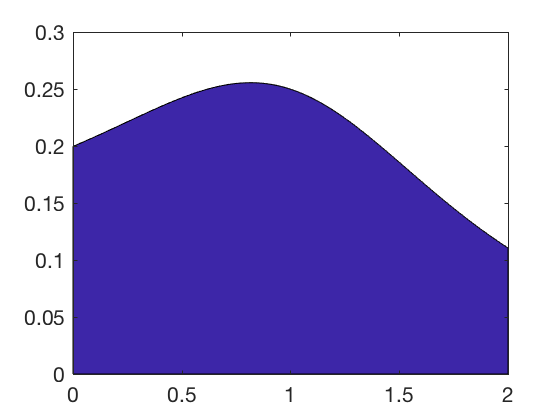

In [5]:
x = 0:0.01:2;
f = fx(x);
area(x,f);

In [6]:
% Usando Trapz
Q2 = trapz(x,f);
disp(Q2);

0.4213


Notas:
- La función `quad` es evaluada de manera vectorial por lo que las divisiones, las multiplicaciones y las potencias deben explicitarse como operaciones elemento por elemento.
- La función `quad` sólo permite integrar la función en límites finitos. Para transformar los límites de la integral usar cambio de variable.
- La función `trapz` es una función vectorial. Evaluamos la función en el intervalo de puntos en que queremos integrar.
- `quad` funciona mejor que `trapz` con funciones que tiene un comportamiento suave y sin discontinuidades.

Ejemplo: Para integrar 

$$\int^{\infty}_{-\infty} f(x) dx$$

usar $x=\frac{t}{1-t^2}$ de tal manera que $dx=\frac{1+t^2}{(1-t^2)^2} dt$ y $t=\frac{\sqrt{1+4x^2}-1}{2x}$. Note que:

$$\int^{\infty}_{-\infty} f(x) dx = \int^{1}_{-1} f\left(\frac{t}{1-t^2} \right) \frac{1+t^2}{(1-t^2)^2} dt$$

Éste y otro ejemplos pueden ser encontrado en la página de Wikipedia sobre [integración numérica](https://en.wikipedia.org/wiki/Numerical_integration).

En versiones más recientes de Matlab se incorporó la función `integral` que usa algoritmos más eficientes y precisos. Además permite integrar en límites `-Inf` e `Inf`.

- `integral(fun,a,b)` donde `fun` es una función escalar. 

En el futuro, Matlab removerá `quad` y sólo quedara la función `integral`.

Ejemplo: Resolvamos el siguiente problema:

$$\int^{\infty}_{0} e^{-x^2} (log(x))^2 dx$$

In [7]:
f = @(x) exp(-x.^2).*log(x).^2;
Q3 = integral(f,0,Inf);
disp(Q3);

1.9475


**Integrales Dobles**

Para integrales dobles usamos el función `integral2`. La sintaxis es como sigue:

- `integral2(fun,xmin,xmax,ymin,ymax)`

Por ejemplo, integremos la siguiente función:

$$  \int^1_0  \int^{1-x}_{0}\frac{1}{\sqrt{(x + y)} (1 + x + y)^2} dy dx$$

Para implementar el problema anterior debemos definir dos funciones:

In [8]:
fun = @(x,y) 1./(sqrt(x + y).*(1 + x + y).^2)
ymax = @(x) 1 - x

fun =

  function_handle with value:

    @(x,y)1./(sqrt(x+y).*(1+x+y).^2)


ymax =

  function_handle with value:

    @(x)1-x


In [9]:
Q4 = integral2(fun,0,1,0,ymax);
disp(Q4)

0.2854


In [10]:
Q4 = integral2(fun,0,1,0,@(x) 1-x)

Q4 =

    0.2854
